In [1]:
# imports for reading and writing (input & output) files:

import pandas as pd
import numpy as np


# Visualization

from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.__version__


# Statistic Analysis (t-test)

from scipy.stats import ttest_1samp
from scipy.stats import t
from scipy.stats import ttest_ind


# Regression Models

from sklearn.model_selection import train_test_split
# Linear Regression
from sklearn.linear_model import LinearRegression
# Ridge
from sklearn.linear_model import Ridge
# Lasso
from sklearn.linear_model import Lasso
# Elastic Net
from sklearn.linear_model import ElasticNet
# Regression Evaluation
from sklearn.metrics import r2_score


# Clustering 

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# Clustering Evaluation
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score


# PCA

from sklearn.decomposition import SparsePCA


# Classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# Classification Evaluation
from sklearn.metrics import f1_score


# Lime
import lime
from lime import lime_tabular


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Body Measurements

#### Note: A major part of the data consist of children, so we expect to unclear results at the part of ML models and PCA, because the pysical stats are very similar at this age.

Attribute information:

* Gender (Male and Female (M=1 & F= 2) (391 Males & 324 Females)
* Age (1 year and above)
* HeadCircumference (in inches)
* ShoulderWidth (in inches)
* ChestWidth (in inches)
* Belly (in inches)
* Waist (in inches)
* Hips (in inches)
* ArmLength (in inches)
* ShoulderToWaist (in inches)
* WaistToKnee (in inches)
* LegLength (in inches)
* TotalHeight - from head to toe (in inches)
* Class Label (Not defined)

##### Dataset Characteristics: Multivariate, Numerical
##### Attribute Characteristics: Real
##### Number of Instances: 13
##### Number of Attributes: 716

In [2]:
df = pd.read_csv('Body Measurements.csv', header=0, sep=',')

# EDA - Exploratory Data Analysis

In [3]:
df.head()

Gender  Age  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  \
0     1.0   30                 22             18          20     18     14   
1     1.0   28                 19             22          17     18     21   
2     2.0   27                 21             18          16     14     10   
3     1.0   29                 20             20          18     11     19   
4     2.0   28                 16             14          18     13     11   

   Hips  ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0    22         22               25           25         22           52  
1    25         28               23           25         20           56  
2    15         21               18           14         18           53  
3    14         24               21           20         21           45  
4    30         25               22           32         13           47

In [4]:
df.dtypes

Gender               float64
Age                    int64
HeadCircumference      int64
ShoulderWidth          int64
ChestWidth             int64
Belly                  int64
Waist                  int64
Hips                   int64
ArmLength              int64
ShoulderToWaist        int64
WaistToKnee            int64
LegLength              int64
TotalHeight            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


In [6]:
df.describe(include='all')

Gender         Age  HeadCircumference  ShoulderWidth  ChestWidth  \
count  715.000000  716.000000         716.000000     716.000000  716.000000   
mean     1.453147   15.340782          20.574022      14.317039   14.569832   
std      0.498148   11.831501           3.743353       4.762181    5.314646   
min      1.000000    1.000000           5.000000       4.000000    6.000000   
25%      1.000000    7.000000          19.000000      11.000000   11.000000   
50%      1.000000   11.000000          20.000000      14.000000   13.000000   
75%      2.000000   21.000000          22.000000      18.000000   17.000000   
max      2.000000   68.000000          80.000000      87.000000   38.000000   

            Belly       Waist        Hips   ArmLength  ShoulderToWaist  \
count  716.000000  716.000000  716.000000  716.000000       716.000000   
mean    20.199721   19.265363   19.378492   18.817039        17.900838   
std     10.132993    8.770706    8.745223    5.376592         5.379313   
min      5.000000    2.000000    7.000000    6.000000         1.000000   
25%     15.000000   12.000000   12.000000   16.000000        13.000000   
50%     20.000000   20.000000   18.000000   19.000000        17.500000   
75%     23.000000   23.000000   24.000000   22.000000        22.000000   
max    213.000000   91.000000   63.000000   66.000000        39.000000   

       WaistToKnee   LegLength  TotalHeight  
count   716.000000  716.000000   716.000000  
mean     16.560056   26.833799    48.118715  
std       5.204411    7.925988    12.156722  
min       4.000000    9.000000    19.000000  
25%      13.000000   21.000000    40.000000  
50%      16.000000   26.000000    48.000000  
75%      20.000000   32.000000    55.000000  
max      45.000000   50.000000    89.000000

### Remove missing data

In [7]:
df.dropna(axis=0, how='any', inplace = True)

In [8]:
df.describe(include='all')

Gender         Age  HeadCircumference  ShoulderWidth  ChestWidth  \
count  715.000000  715.000000         715.000000     715.000000  715.000000   
mean     1.453147   15.349650          20.574825      14.318881   14.574825   
std      0.498148   11.837401           3.745912       4.765259    5.316686   
min      1.000000    1.000000           5.000000       4.000000    6.000000   
25%      1.000000    7.000000          19.000000      11.000000   11.000000   
50%      1.000000   11.000000          20.000000      14.000000   13.000000   
75%      2.000000   21.000000          22.000000      18.000000   17.000000   
max      2.000000   68.000000          80.000000      87.000000   38.000000   

            Belly       Waist        Hips   ArmLength  ShoulderToWaist  \
count  715.000000  715.000000  715.000000  715.000000       715.000000   
mean    20.198601   19.258741   19.390210   18.812587        17.906294   
std     10.140042    8.775055    8.745718    5.379035         5.381096   
min      5.000000    2.000000    7.000000    6.000000         1.000000   
25%     15.000000   12.000000   12.000000   16.000000        13.000000   
50%     20.000000   20.000000   18.000000   19.000000        18.000000   
75%     23.000000   23.000000   24.000000   22.000000        22.000000   
max    213.000000   91.000000   63.000000   66.000000        39.000000   

       WaistToKnee   LegLength  TotalHeight  
count   715.000000  715.000000   715.000000  
mean     16.562238   26.836364    48.124476  
std       5.207727    7.931239    12.164254  
min       4.000000    9.000000    19.000000  
25%      13.000000   21.000000    40.000000  
50%      16.000000   26.000000    48.000000  
75%      20.000000   32.000000    55.000000  
max      45.000000   50.000000    89.000000

## Handling Data
### Convert inch --> cm (multiplying by 2.54)

In [9]:
inch_columns = ['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 
                'WaistToKnee', 'LegLength', 'TotalHeight']

for col in inch_columns:
    for row in df.index:
        df.loc[row, col] = df.loc[row, col] * 2.54

In [10]:
df.head()

Gender  Age  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  \
0     1.0   30              55.88          45.72       50.80  45.72  35.56   
1     1.0   28              48.26          55.88       43.18  45.72  53.34   
2     2.0   27              53.34          45.72       40.64  35.56  25.40   
3     1.0   29              50.80          50.80       45.72  27.94  48.26   
4     2.0   28              40.64          35.56       45.72  33.02  27.94   

    Hips  ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0  55.88      55.88            63.50        63.50      55.88       132.08  
1  63.50      71.12            58.42        63.50      50.80       142.24  
2  38.10      53.34            45.72        35.56      45.72       134.62  
3  35.56      60.96            53.34        50.80      53.34       114.30  
4  76.20      63.50            55.88        81.28      33.02       119.38

In [11]:
df.describe(include='all')

Gender         Age  HeadCircumference  ShoulderWidth  ChestWidth  \
count  715.000000  715.000000         715.000000     715.000000  715.000000   
mean     1.453147   15.349650          52.260056      36.369958   37.020056   
std      0.498148   11.837401           9.514617      12.103759   13.504383   
min      1.000000    1.000000          12.700000      10.160000   15.240000   
25%      1.000000    7.000000          48.260000      27.940000   27.940000   
50%      1.000000   11.000000          50.800000      35.560000   33.020000   
75%      2.000000   21.000000          55.880000      45.720000   43.180000   
max      2.000000   68.000000         203.200000     220.980000   96.520000   

            Belly       Waist        Hips   ArmLength  ShoulderToWaist  \
count  715.000000  715.000000  715.000000  715.000000       715.000000   
mean    51.304448   48.917203   49.251133   47.783972        45.481986   
std     25.755706   22.288639   22.214123   13.662748        13.667984   
min     12.700000    5.080000   17.780000   15.240000         2.540000   
25%     38.100000   30.480000   30.480000   40.640000        33.020000   
50%     50.800000   50.800000   45.720000   48.260000        45.720000   
75%     58.420000   58.420000   60.960000   55.880000        55.880000   
max    541.020000  231.140000  160.020000  167.640000        99.060000   

       WaistToKnee   LegLength  TotalHeight  
count   715.000000  715.000000   715.000000  
mean     42.068084   68.164364   122.236168  
std      13.227627   20.145348    30.897205  
min      10.160000   22.860000    48.260000  
25%      33.020000   53.340000   101.600000  
50%      40.640000   66.040000   121.920000  
75%      50.800000   81.280000   139.700000  
max     114.300000  127.000000   226.060000

## Outliers
### Remove outliers according to IQR

In [12]:
outliers_columns = ['Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 
                'WaistToKnee', 'LegLength', 'TotalHeight']

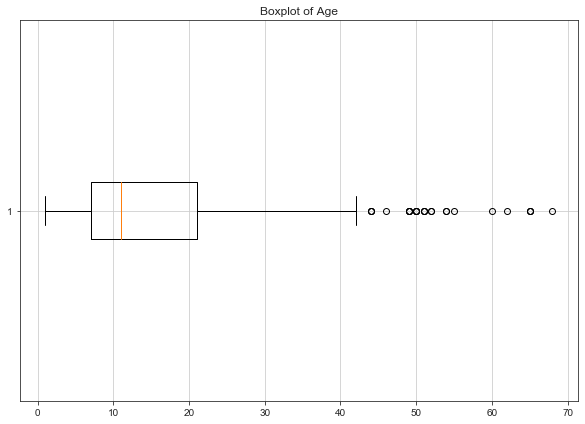

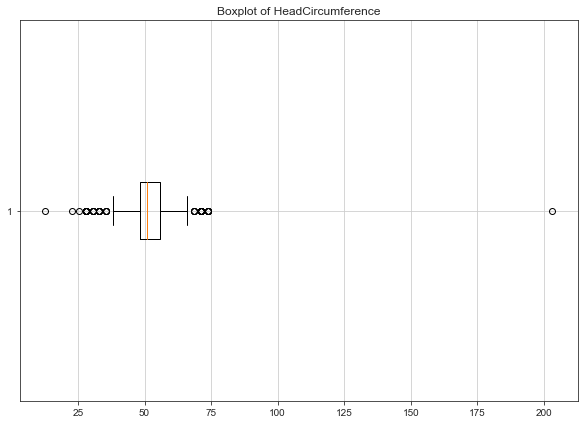

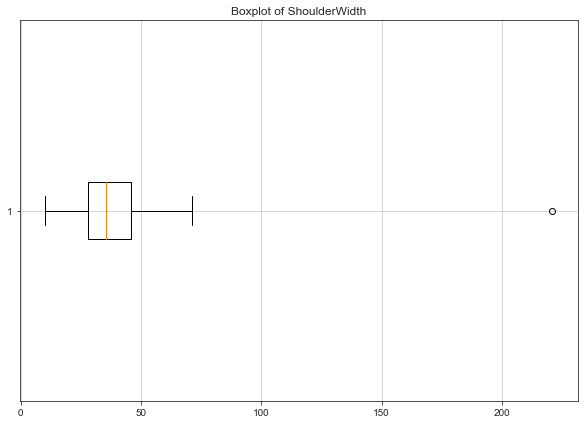

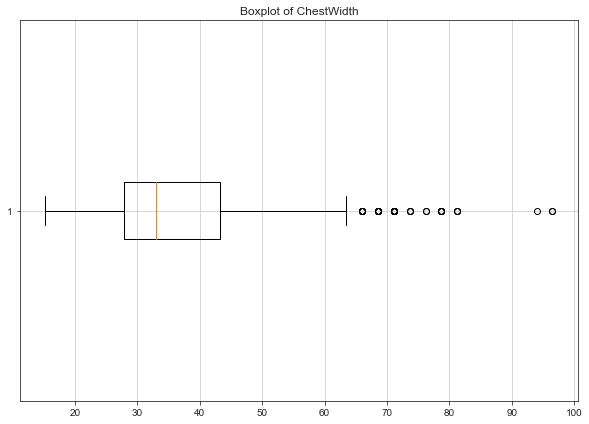

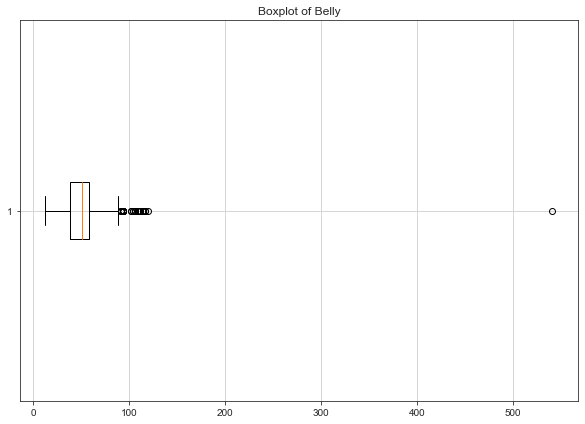

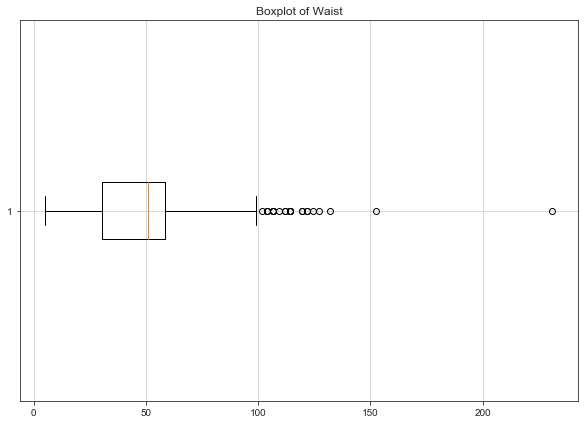

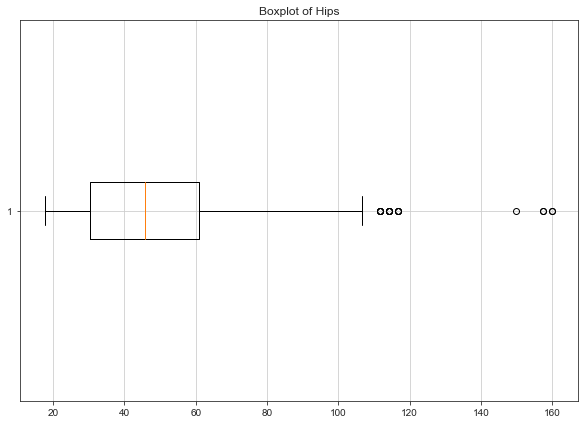

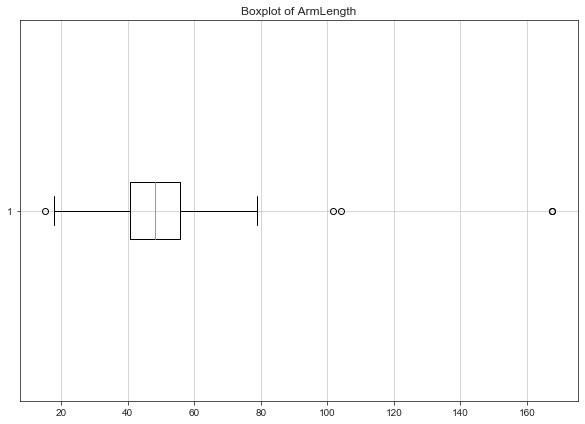

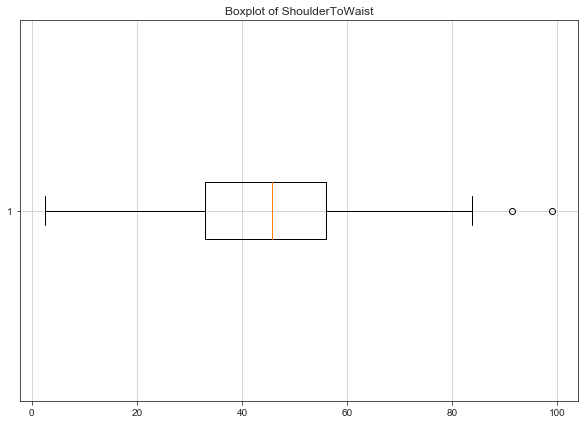

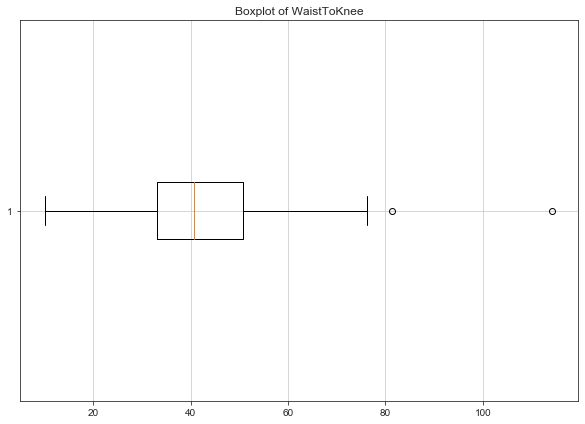

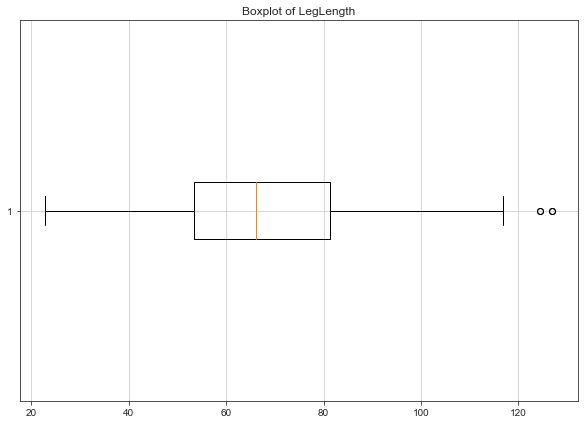

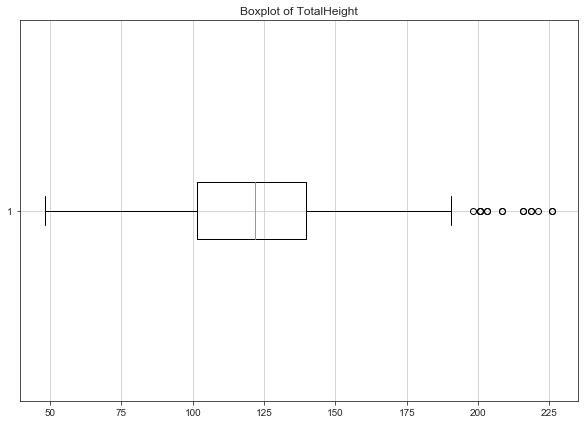

In [13]:
# plot distributions

sns.set_style('ticks',{'axes.grid' : False})

for f in outliers_columns:
    fig, (ax) = plt.subplots(1, 1, figsize=(10,7))
    
    
    ax.boxplot(df[f], vert=False)
    ax.grid()   
    ax.set_title('Boxplot of ' + f)
    
    plt.show()

In [14]:
index_list = []
for col in outliers_columns:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    Dare_outlier_rows = df[(df[col] < Q1 - 2.25 * IQR) | (df[col] > Q3 + 2.25 * IQR)].index
    index_list.extend(Dare_outlier_rows)
    print("column is:" , col, "\nand len is: " ,len(Dare_outlier_rows))
    print('\n')

    
# Because it is possible to have duplicate rows, we will create a set    
index_set = set(index_list)
print(index_set, "\n", len(index_set))

column is: Age 
and len is:  9


column is: HeadCircumference 
and len is:  24


column is: ShoulderWidth 
and len is:  1


column is: ChestWidth 
and len is:  11


column is: Belly 
and len is:  16


column is: Waist 
and len is:  7


column is: Hips 
and len is:  5


column is: ArmLength 
and len is:  4


column is: ShoulderToWaist 
and len is:  0


column is: WaistToKnee 
and len is:  1


column is: LegLength 
and len is:  0


column is: TotalHeight 
and len is:  2


{384, 129, 385, 259, 262, 136, 9, 140, 141, 268, 271, 272, 273, 269, 270, 143, 21, 144, 279, 30, 296, 298, 299, 300, 301, 302, 303, 182, 183, 568, 62, 323, 324, 325, 332, 205, 347, 350, 96, 352, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 370, 243, 244, 245, 116, 371, 248, 249, 379, 124, 125, 126} 
 63


In [15]:
# Remove the outliers Columns
df.drop(index_set, inplace=True)

In [16]:
df.head()

Gender  Age  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  \
0     1.0   30              55.88          45.72       50.80  45.72  35.56   
1     1.0   28              48.26          55.88       43.18  45.72  53.34   
2     2.0   27              53.34          45.72       40.64  35.56  25.40   
3     1.0   29              50.80          50.80       45.72  27.94  48.26   
4     2.0   28              40.64          35.56       45.72  33.02  27.94   

    Hips  ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0  55.88      55.88            63.50        63.50      55.88       132.08  
1  63.50      71.12            58.42        63.50      50.80       142.24  
2  38.10      53.34            45.72        35.56      45.72       134.62  
3  35.56      60.96            53.34        50.80      53.34       114.30  
4  76.20      63.50            55.88        81.28      33.02       119.38

## Visualizations 

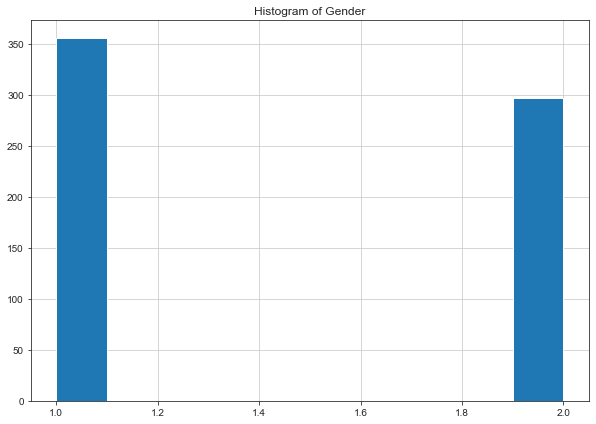

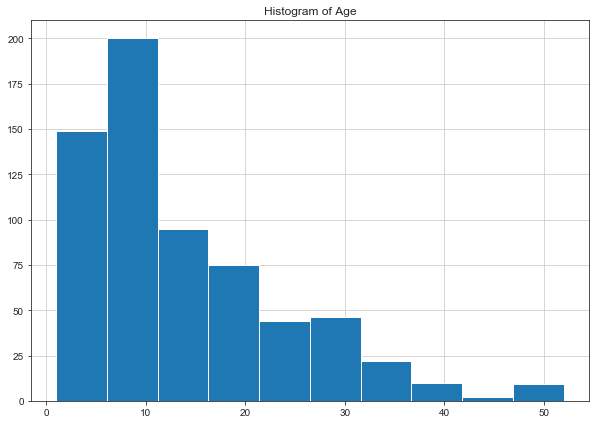

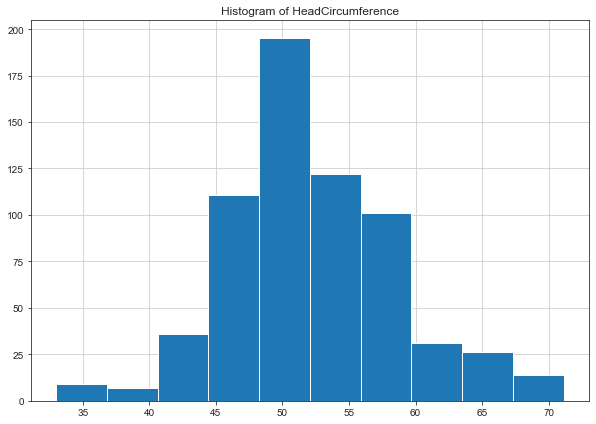

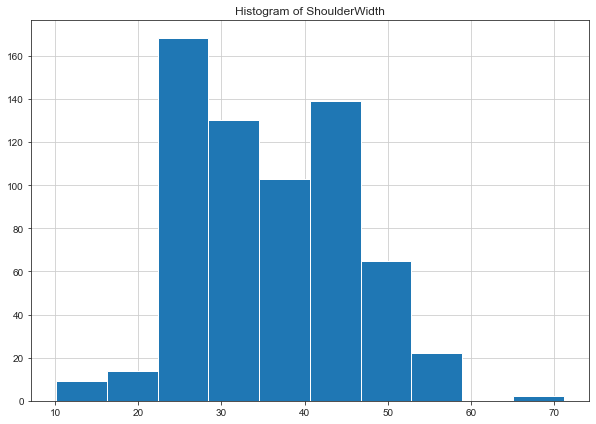

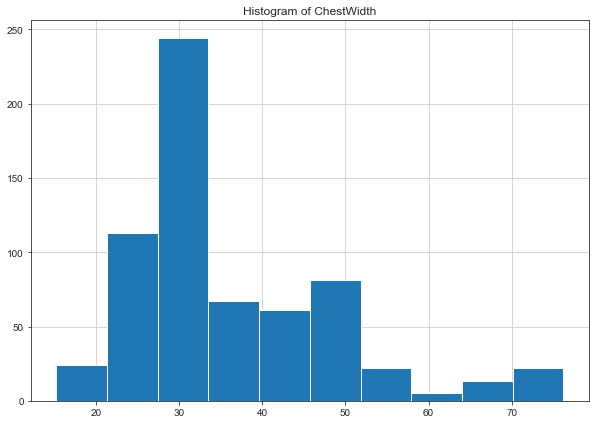

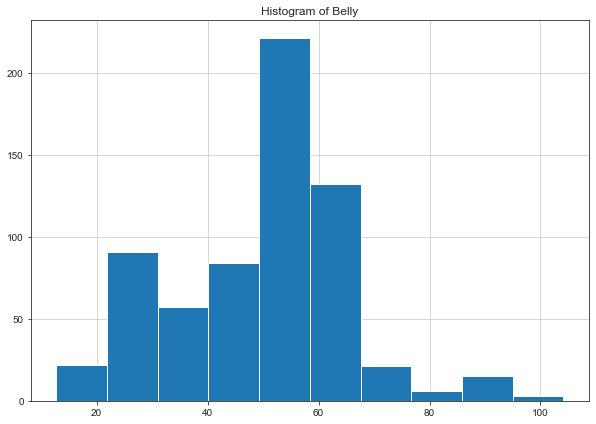

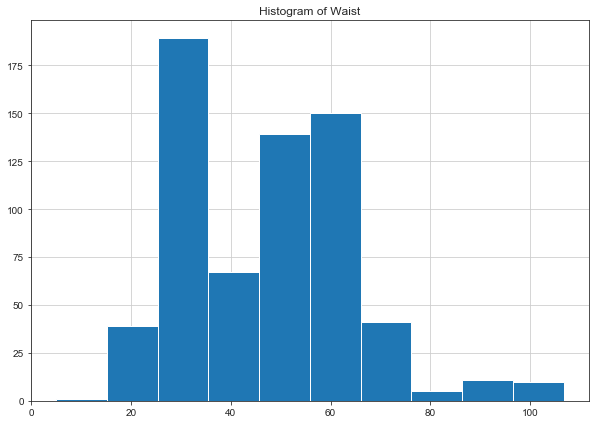

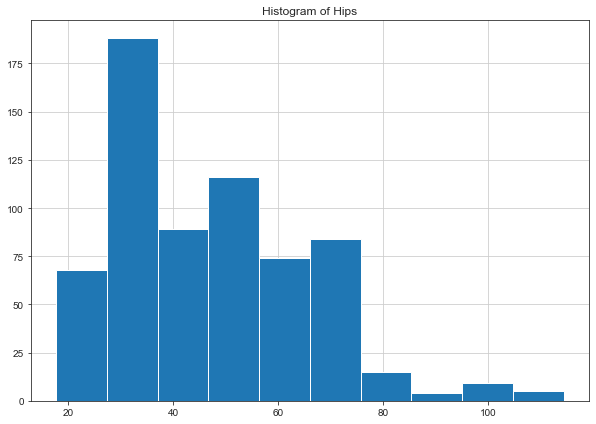

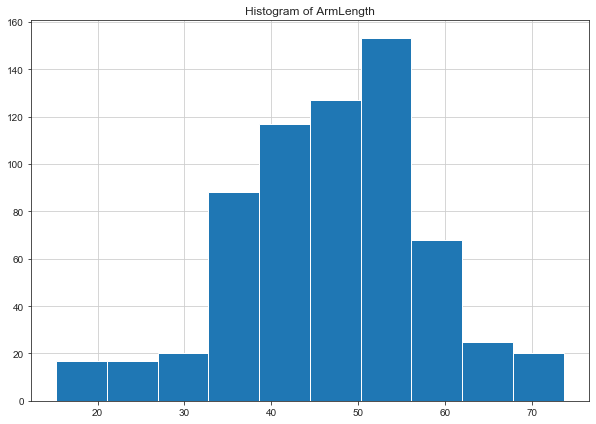

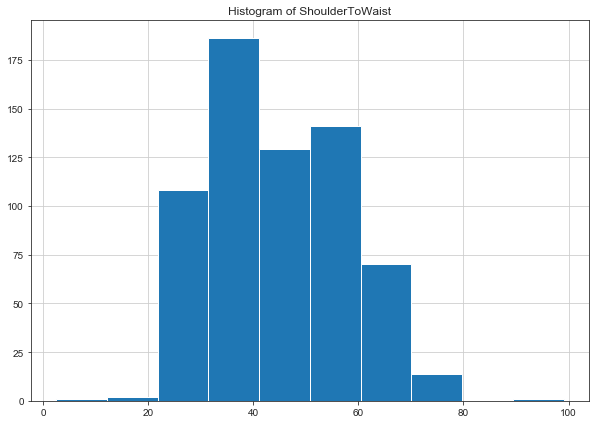

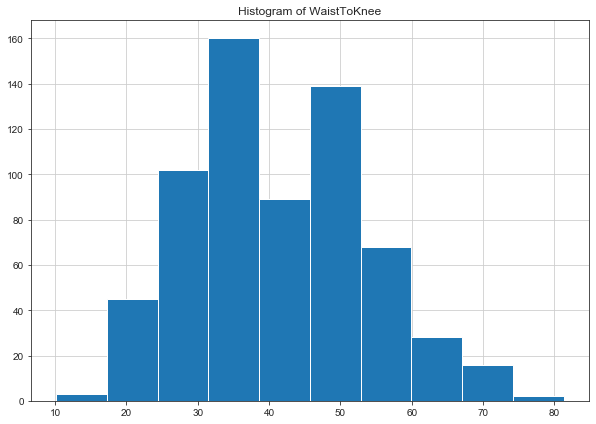

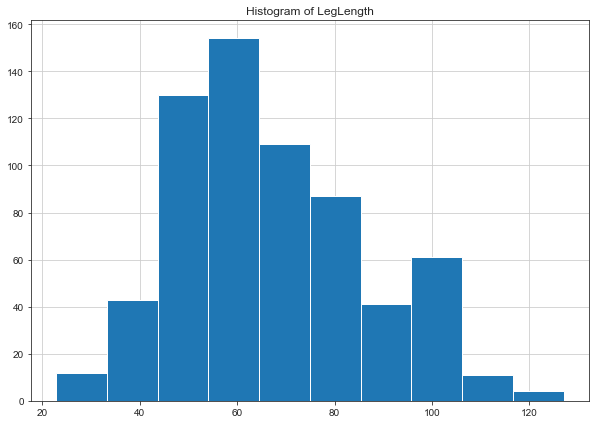

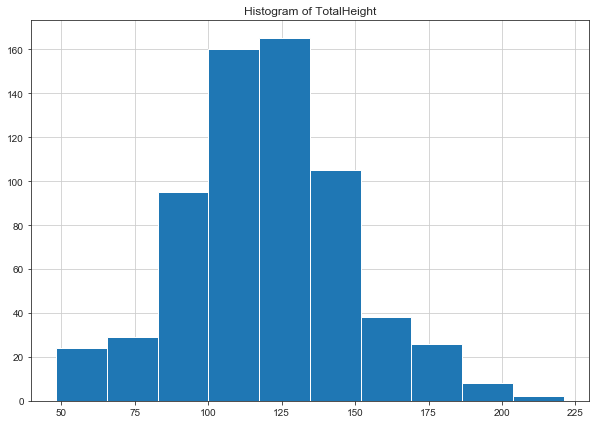

In [17]:
# plot distributions

for f in df.columns:
    fig, (ax) = plt.subplots(1, 1, figsize=(10,7))
    
    ax.hist(df[f])
    ax.grid()
    ax.set_title('Histogram of ' + f)
    
  
    plt.show()

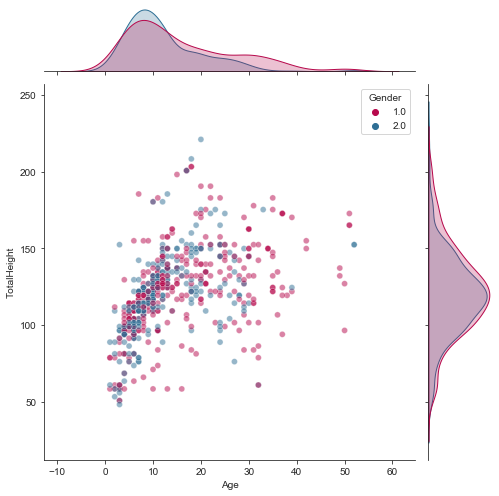

In [18]:
sns.jointplot(data=df, x='Age', y='TotalHeight', 
              height=7,
              hue='Gender',
              alpha=0.5,
              palette={1: '#b7094c', 2: '#2e6f95'})
plt.show()

## Features' Correlations

In [19]:
features = ['Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth',
                'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist',
                'WaistToKnee', 'LegLength', 'TotalHeight']

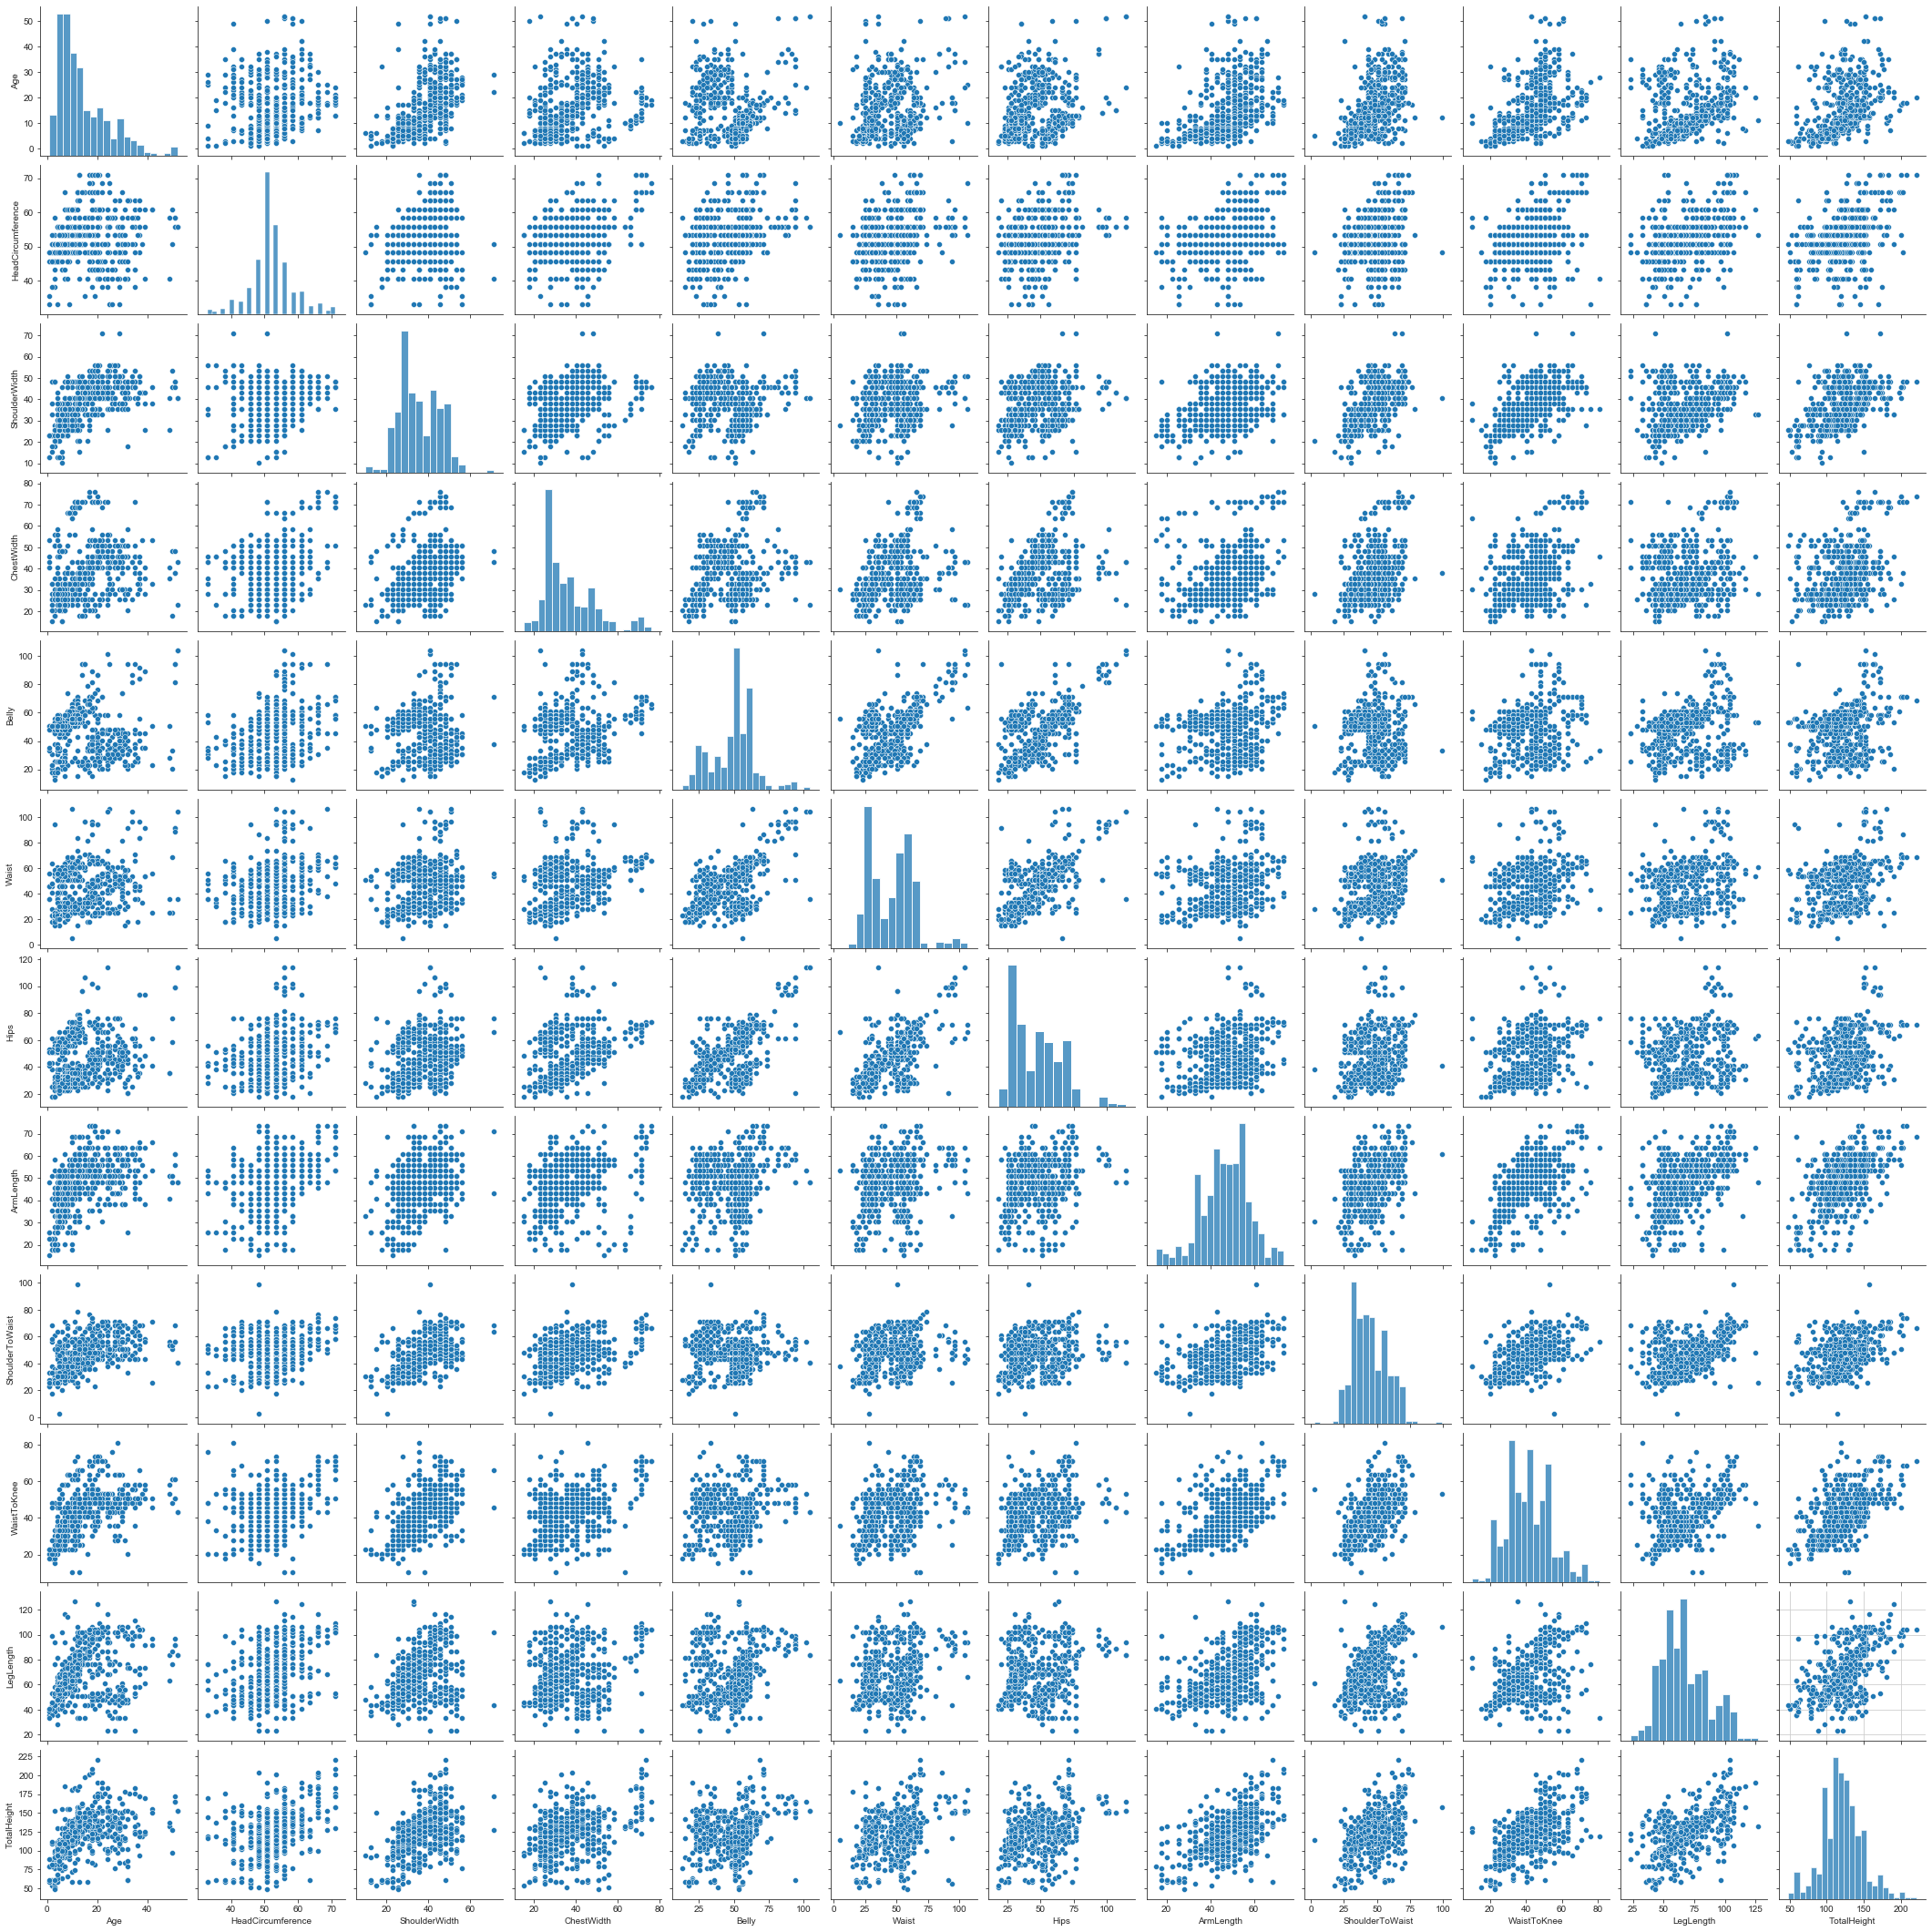

In [20]:
sns.pairplot(df[features])
plt.grid()

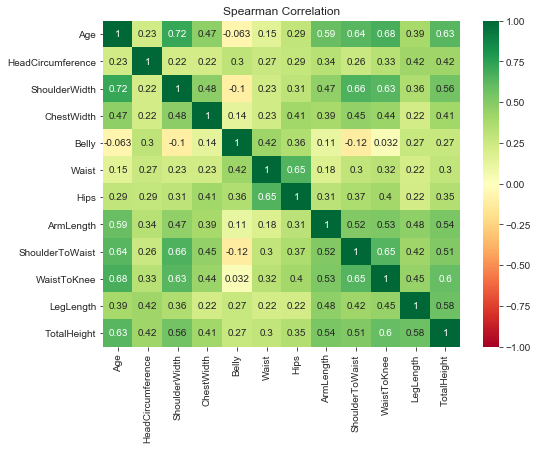

In [21]:
corr_spearman = df[features].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

# Hypothesis testing

## One side t-test:

### Female have thiner waist than the previously known average (all population)

1 - Male; 2 - Female

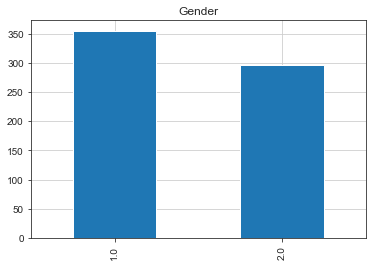

1.0    355
2.0    297
Name: Gender, dtype: int64


In [22]:
df.Gender.value_counts().plot(kind='bar')
plt.title('Gender')
plt.grid()
plt.show()

print(df.Gender.value_counts())

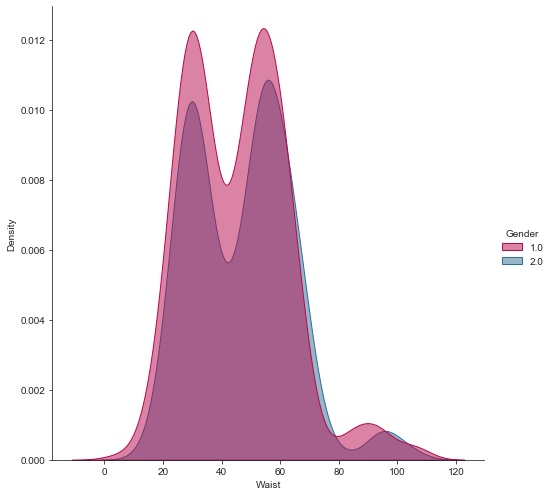

In [23]:
sns.displot(df, x="Waist", hue="Gender", kind="kde", height=7,
              alpha=0.5, palette={1: '#b7094c', 2: '#2e6f95'}, fill=True)

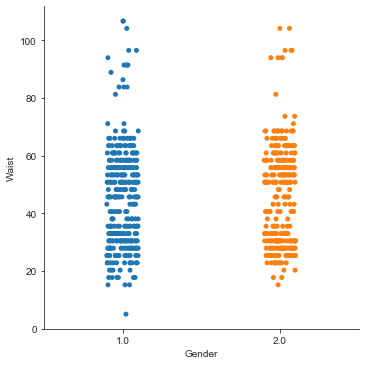

In [24]:
sns.catplot(x="Gender", y="Waist", data=df)

In [25]:
Female_waist = df[df['Gender'] == 2]['Waist']
Female_waist

2      25.40
4      27.94
5      40.64
6      30.48
7      58.42
       ...  
706    58.42
708    48.26
710    60.96
711    45.72
715    50.80
Name: Waist, Length: 297, dtype: float64

In [26]:
Female_waist.mean()

46.9515151515151

In [27]:
popmean_waist = df['Waist'].mean()

## Left side t-test

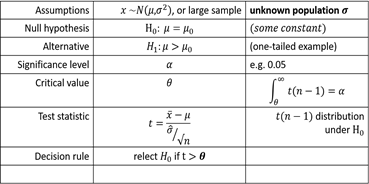

In [28]:
# Calculate the t-statistic and p-value
ttest_1samp(Female_waist.values, popmean=popmean_waist, alternative="less")

Ttest_1sampResult(statistic=0.9126771903607891, pvalue=0.8189224550409993)

#### We choose:

* Significance Level = 0.05
* Confidance Level = 95%

In [29]:
# define probability
p = 0.95 
degrees_of_freedom = 296 # n-1

# retrieve value <= probability
critical_value = t.ppf(p, degrees_of_freedom)
print("The significance level is: ", p, "\nThe critical value is: ", critical_value)

The significance level is:  0.95 
The critical value is:  1.6500177430554666


### Decision rule is: 

#### t < critical value (0.88 < 1.65), hence we don't relect the null assumption.

## ***********************************************************************************************************************************************************************************************************************************

## Two Sample test - Independent Samples t-Test:


Compare two groups, Sample from each one independently.

* H0: µ1 = µ2 (the two population means are equal)
* HA: µ1 ≠µ2 (the two population means are not equal)


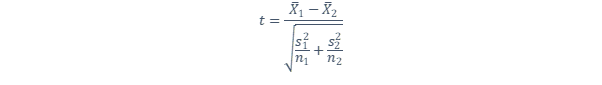

### We want to know if male and female have the same mean Head Circumference. 


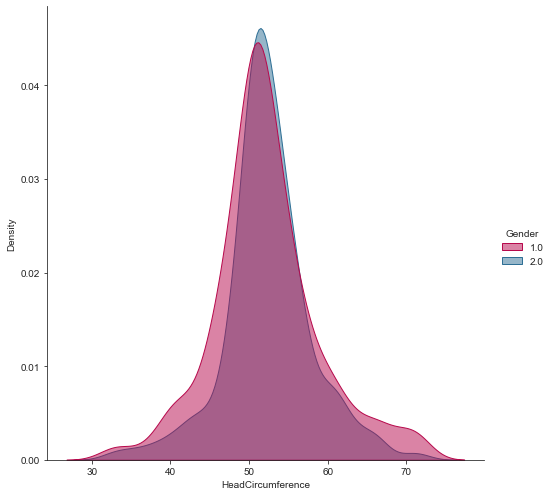

In [30]:
sns.displot(df, x="HeadCircumference", hue="Gender", kind="kde", height=7,
              alpha=0.5, palette={1: '#b7094c', 2: '#2e6f95'}, fill=True)

In [31]:
female_HeadCircumference = df[df['Gender'] == 2]['HeadCircumference']
male_HeadCircumference = df[df['Gender'] == 1]['HeadCircumference']

Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

In [32]:
female_HeadCircumference_varaince = np.var(female_HeadCircumference)
male_HeadCircumference_varaince = np.var(male_HeadCircumference)
variance_ratio = male_HeadCircumference_varaince / female_HeadCircumference_varaince
print("variance ratio is: ", variance_ratio)

variance ratio is:  1.4892638956649982


The ratio of the larger sample variance to the smaller sample variance is 1.489, which is less than 4. This means we can assume that the population variances are equal.

In [33]:
#perform two sample t-test with equal variances
ttest_ind(a=female_HeadCircumference, b=male_HeadCircumference, equal_var=True)

Ttest_indResult(statistic=0.3897908978462183, pvalue=0.6968188599064944)

#### We choose:

* Significance Level = 0.05 ---> /2 = 0.025
* Confidance Level = 97.5%

In [34]:
# define probability
p = 0.975
degrees_of_freedom = 651 # n-2

# retrieve value <= probability
critical_value = t.ppf(p, degrees_of_freedom)
print("The significance level is: ", p, "\nThe critical value is: ", critical_value)

The significance level is:  0.975 
The critical value is:  1.9636146956033291


### The decision rule is: Reject H0 if t < -1.963 or if t > 1.963 ---> So we don't reject H0.

# Applying Regression Models

### We will try to predict the height.

### 1. Linear Regression

In [35]:
X = df.drop('TotalHeight', 1)
y = df['TotalHeight']

In [36]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Create linear regression object
# Train the model using the training sets
reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred_linear_reg = reg.predict(X_test)

In [38]:
# print the coefficients
print(reg.intercept_)
print(reg.coef_)

-2.555163947746067
[ 3.4019555   0.29540915  0.3459267   0.5059092   0.03241292  0.30233285
 -0.0483366   0.0085381   0.35703052  0.05920328  0.4868987   0.35898977]


In [39]:
r2_score(y_test, y_pred_linear_reg)

0.5519492617129202

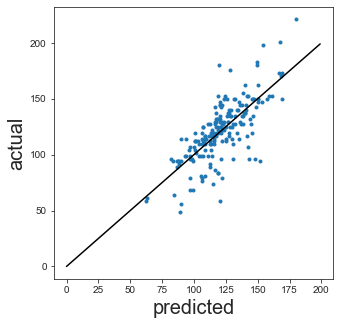

In [40]:
plt.figure(figsize=(5,5))
plt.plot(y_pred_linear_reg, y_test, '.')
plt.xlabel("predicted", fontsize=20)
plt.ylabel("actual", fontsize=20)
plt.plot(range(200), range(200), "-k")

### 2. Ridge

In [41]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)
print(ridge_reg.coef_)
print(ridge_reg.intercept_)

[ 3.40192312  0.29540901  0.34592691  0.50590914  0.03241284  0.30233293
 -0.0483366   0.00853818  0.35703053  0.05920327  0.48689856  0.3589897 ]
-2.5551174011233826


In [42]:
r2_score(y_test, y_pred_ridge)

0.5519493664471518

### 3. Lasso

In [43]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)
print(lasso_reg.coef_)
print(lasso_reg.intercept_)

[ 3.39760272  0.29538284  0.34592758  0.50589531  0.03240181  0.30233677
 -0.04832034  0.0085436   0.35703325  0.05919585  0.48688193  0.35898272]
-2.547416447791477


In [44]:
r2_score(y_test, y_pred_lasso)

0.5519638021811896

### 4. Elastic Net

In [45]:
elastic_net_reg = ElasticNet(random_state=0)
elastic_net_reg.fit(X_train, y_train)

y_pred_elastic_net = elastic_net_reg.predict(X_test)
print(elastic_net_reg.coef_)
print(elastic_net_reg.intercept_)

[ 0.38577393  0.27802453  0.34667186  0.49360557  0.02601704  0.3056991
 -0.03940392  0.01390488  0.35868777  0.05695646  0.47356239  0.35402291]
2.8025403500772086


In [46]:
r2_score(y_test, y_pred_elastic_net)

0.5590935538602861

### Discuss the results:

As we can see, there is no big difference between the Linear, Ridge, Lasso and Elastic-Net regressions. The R^2 score is not the best, but it is closer to 1 than to 0.


# Clustring

### We will try to cluster our data according to gender.

## K-Means

In [47]:
X_cluster = df.drop('Gender', 1)
y_cluster = df['Gender']

In [48]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_cluster)

y_pred_cluster = kmeans.labels_
print(y_pred_cluster)

kmeans.predict(X_cluster)
print(kmeans.cluster_centers_)

[1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 

In [49]:
normalized_mutual_info_score(y_cluster, y_pred_cluster)

0.002286236225812244

In [50]:
fowlkes_mallows_score(y_cluster, y_pred_cluster)

0.5060747589460158

## GMM

In [51]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X_cluster)

y_predict_gmm = gm.predict(X_cluster)
print(y_predict_gmm)

print(gm.means_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 

In [52]:
normalized_mutual_info_score(y_cluster, y_predict_gmm)

0.03947725994985444

In [53]:
fowlkes_mallows_score(y_cluster, y_predict_gmm)

0.5314412216683384

### Discuss the results:
We did not get good clustering, that may be because there is not a significance difference between both groups of gender.
The GMM model works slightly better because it based on the distribution of each group.

# PCA

In [54]:
from sklearn.decomposition import SparsePCA

transformer = SparsePCA(n_components=2, random_state=0)
transformer.fit(X)
df_transformed = transformer.transform(X)

print(df_transformed.shape)

# most values in the components_ are zero (sparsity)
print(np.mean(transformer.components_ == 0))

(652, 2)
0.041666666666666664


In [55]:
df_transformed

array([[-23.3729603 ,   0.75105594],
       [-22.70530314, -13.43440584],
       [  3.33482319,  23.54012002],
       ...,
       [ 20.92224283, -14.33391902],
       [-13.64173299, -23.84413579],
       [ 28.00701636,  -7.47437479]])

In [56]:
pca_df = pd.DataFrame(df_transformed, columns=['col_1', 'col_2'])

In [57]:
pca_df['Gender'] = y_cluster

In [58]:
pca_df

col_1      col_2  Gender
0   -23.372960   0.751056     1.0
1   -22.705303 -13.434406     1.0
2     3.334823  23.540120     2.0
3   -15.855374  15.076977     1.0
4   -12.722409  -0.882451     2.0
..         ...        ...     ...
647  -7.962920 -24.517900     1.0
648   8.844538   9.521184     2.0
649  20.922243 -14.333919     2.0
650 -13.641733 -23.844136     1.0
651  28.007016  -7.474375     1.0

[652 rows x 3 columns]

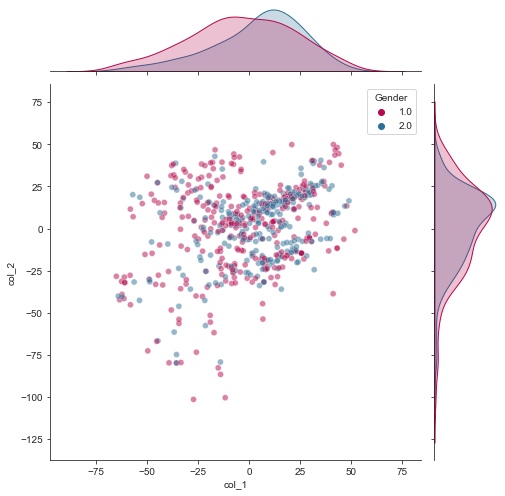

In [59]:
sns.jointplot(data=pca_df, x='col_1', y='col_2', 
              height=7,
              hue='Gender',
              alpha=0.5,
              palette={1: '#b7094c', 2: '#2e6f95'})
plt.show()

### Discuss the results:

At the beggining, we expect to unclear results, becuase our big part of data consist of children, which their physical data is very similar at this age. As a result, we got similar ditributions of male and female.

# classifier + XAI

### We will try to classify the age range and then to explain it.

#### Creating new categorical feature based on ages' ranges

In [60]:
age_cat = []

for i in df.index:
    age = df.loc[i, 'Age']
    if age <= 10:
        age_cat.append(1)
    elif age > 10:
        age_cat.append(2)
        
new_df = df.copy()
new_df['Age_cat'] = age_cat
new_df.drop(labels='Age', axis=1, inplace=True)

new_df.head()

Gender  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist   Hips  \
0     1.0              55.88          45.72       50.80  45.72  35.56  55.88   
1     1.0              48.26          55.88       43.18  45.72  53.34  63.50   
2     2.0              53.34          45.72       40.64  35.56  25.40  38.10   
3     1.0              50.80          50.80       45.72  27.94  48.26  35.56   
4     2.0              40.64          35.56       45.72  33.02  27.94  76.20   

   ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  Age_cat  
0      55.88            63.50        63.50      55.88       132.08        2  
1      71.12            58.42        63.50      50.80       142.24        2  
2      53.34            45.72        35.56      45.72       134.62        2  
3      60.96            53.34        50.80      53.34       114.30        2  
4      63.50            55.88        81.28      33.02       119.38        2

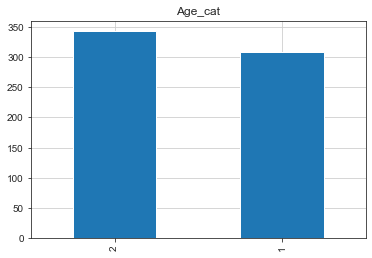

2    343
1    309
Name: Age_cat, dtype: int64


In [61]:
new_df.Age_cat.value_counts().plot(kind='bar')
plt.title('Age_cat')
plt.grid()
plt.show()

print(new_df.Age_cat.value_counts())

In [62]:
X_class = new_df.drop('Age_cat', 1)
y_class = new_df['Age_cat']

# Split the data into training/testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [63]:
d_tree = DecisionTreeClassifier(max_depth=3).fit(X_train_class, y_train_class)

# Make predictions using the testing set
y_pred_class = d_tree.predict(X_test_class)

In [64]:
f1_score(y_test_class, y_pred_class, average='macro')

0.82131228673387

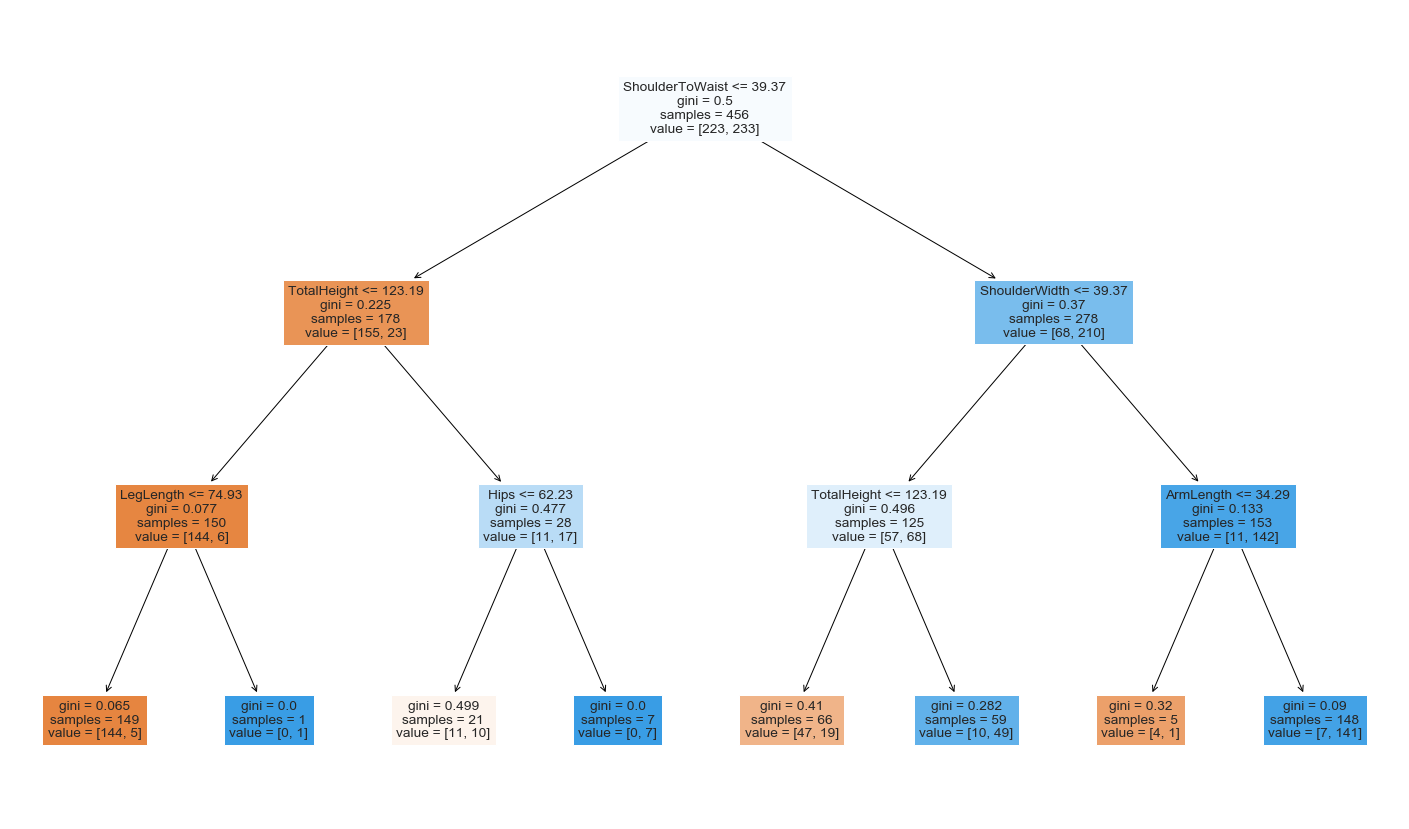

In [65]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(d_tree, 
                   feature_names = X_class.columns,  
                   filled=True) # When 'filled' set to True, paint nodes to indicate majority class for classification
for o in _:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('Black')
        arrow.set_linewidth(1)

## Random Forest Classifier

In [66]:
clf_rf = RandomForestClassifier(max_depth=4).fit(X_train_class, y_train_class)

# Make predictions using the testing set
y_pred_rf = clf_rf.predict(X_test_class)

In [67]:
f1_score(y_test_class, y_pred_rf, average='macro')

0.9118308591992803

In [68]:
# Lime explainer to the Random Forest classiffier

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_class),
    feature_names=X_train_class.columns,
    class_names=['child', 'adolescent / adult'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test_class.iloc[1], 
    predict_fn=clf_rf.predict_proba)

print('The real age category is:', y_test_class.iloc[1])
exp.show_in_notebook(show_table=True)

The real age category is: 1


In [69]:
exp = explainer.explain_instance(
    data_row=X_test_class.iloc[111], 
    predict_fn=clf_rf.predict_proba)

print('The real age category is:', y_test_class.iloc[111])
exp.show_in_notebook(show_table=True)

The real age category is: 2


In [70]:
exp = explainer.explain_instance(
    data_row=X_test_class.iloc[147], 
    predict_fn=clf_rf.predict_proba)

print('The real age category is:', y_test_class.iloc[147])
exp.show_in_notebook(show_table=True)

The real age category is: 2


### Discuss the results:

We are satisfying with the results. We can see that the most significant feature is the height.